# NEUROTOOL: SPINDLE, SLOW WAVE  AND SPIKE TRAIN MODULATION ANALYSIS
This notebook demonstrates how to use functions provided in analysis_utils.py file in order to detect modulations between spindles, slow waves and spike trains. The sample data used in this notebook, RawData.mat, is provided by Wolfger von der Behrens from ETH Zurich Neuroinformatics Institute. The RawData file is not included in GitHub repository because of the file size limitation, however you can download the .mat file from [here](https://drive.google.com/open?id=1AS8igrukqYG_66vjCCK0pY723X7jjxfK) to reproduce the results below.

Please make sure that the libraries in the first cell are installed in your system.

Be careful with the memory while using this guide. If you want to work with full data, it might be a good idea to allocate memory from your SSD to be used like RAM.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from analysis_utils import *
import h5py
from scipy import signal

## 1. Data Extraction
Because the example data is in Matlab format, we first need to convert it into a numpy array. The h5py library is a great tool for this kind of task, however for further use of the library it is not required to have a knowledge of this part. Total data size is 32336000 with a sampling frequency of 32000 Hz. Since the data is quite big, we're going to use a small portion of it for demonstration. 

Further explanation for data is [here](https://drive.google.com/open?id=12bipQuFE98M3gpPlVVFS9lJXnP-yqaOW). While it is not necessary to know where the data came from, it can give you a good understanding of the stimulus.

Note: Make sure that you installed the RawData from the link in the first markdown cell and copied it into the same directory with this notebook.

In [2]:
filepath = 'RawData.mat'
arrays = {}
f = h5py.File(filepath)
for k, v in f.items():
    arrays[k] = np.array(v)

fs = 32000 # sampling frequency
y = arrays['Data'][0] * 1000000 # converting the values to microvolts
l = 32336000
y = y[:int(l/10)] # we will only use 10 percent of the data
l = len(y)
x = np.arange(l) * (1/fs) # indexes of datas in seconds which will be used in drawing graphs
trig = arrays['Trigger'][0] # saving trigger points

#these 2 lines are for cleaning the memory so that we don't get a memory error later
del arrays 
del f

## 2. Plotting Raw Data with Trigger Points
Here we will first plot the data with trigger points in order to give a sense of how our RawData looks like.

<IPython.core.display.Javascript object>


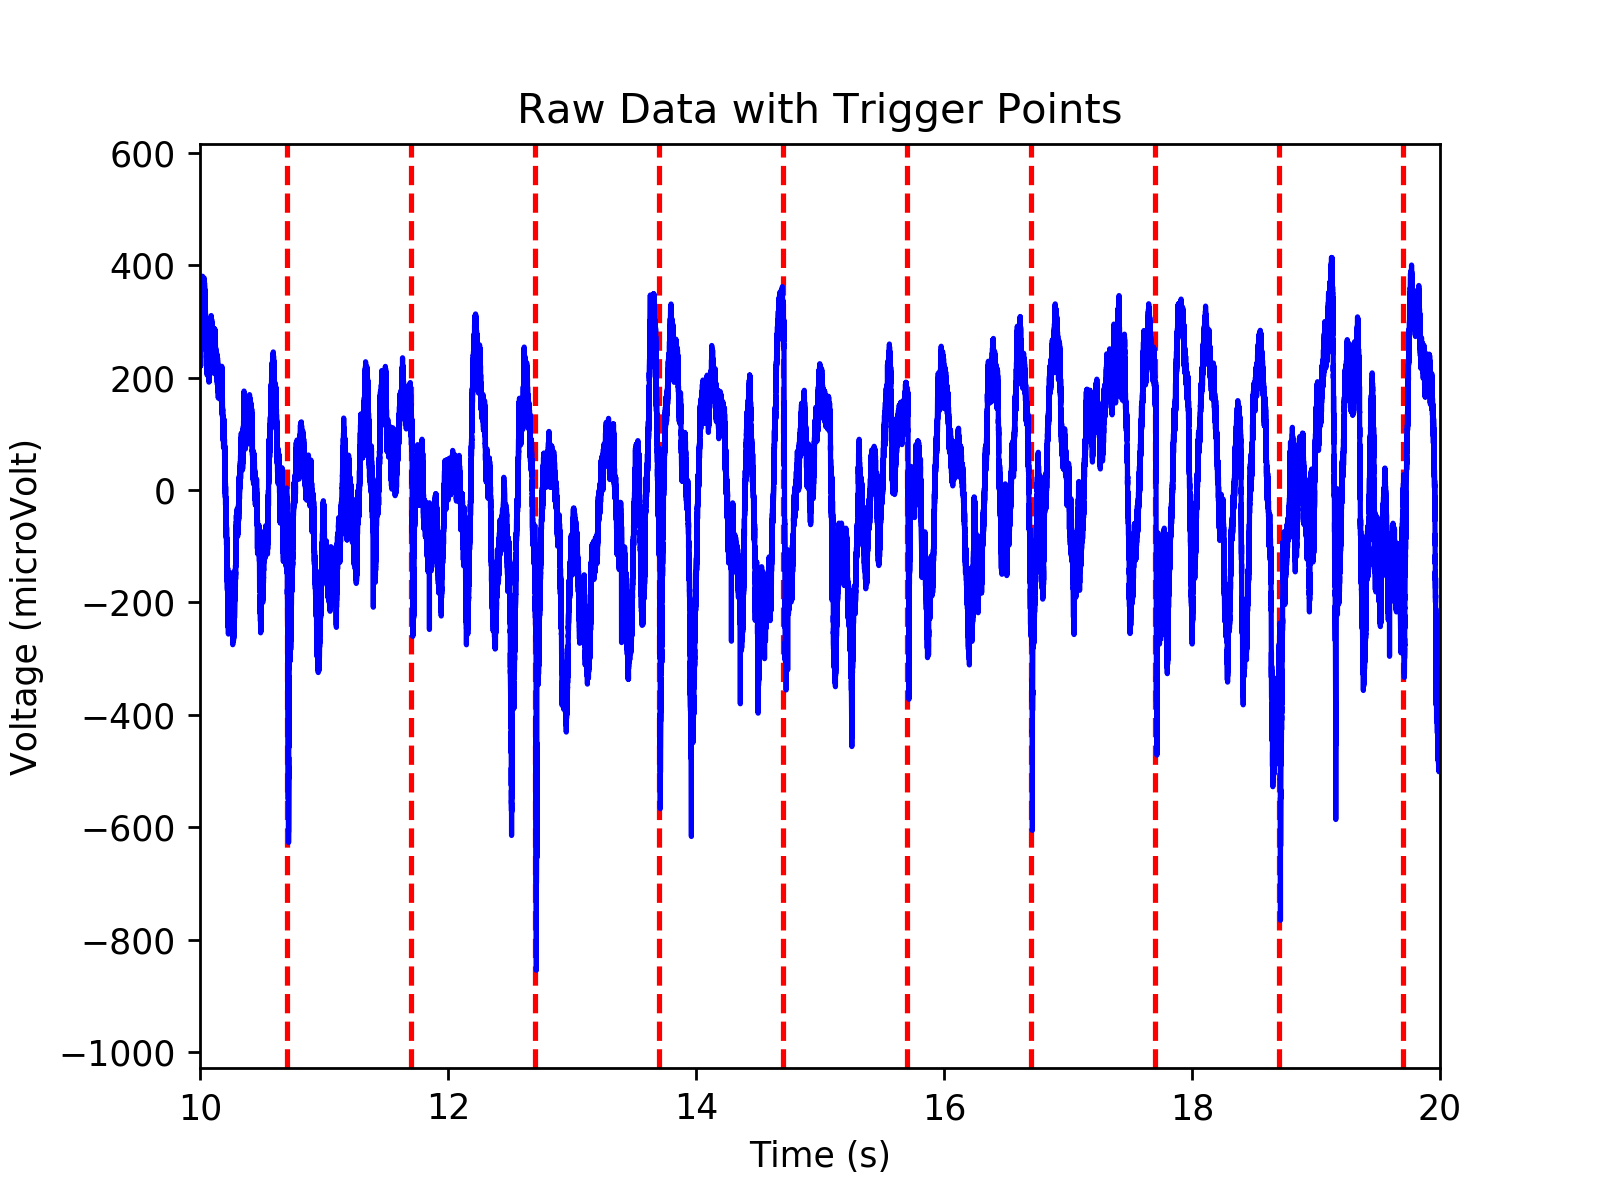

In [3]:
%matplotlib notebook
plt.title("Raw Data with Trigger Points")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (microVolt)")
plt.xlim([10, 20])
for i in trig:
    plt.axvline(x = i, linestyle='--', color='r')
plt.plot(x,y, color='b')     
plt.show()

## 3. Signal Filtering
In this section, we will filter these signals both with highpass and lowpass filters in order to detect spikes, and derive spike train and the Local Field Potential (LFP).

In [1]:
# defining variables for signal filtering
nf = sf/2 # nyquist frequency
cutoff_high = 800 # cutoff frequency for highpass filter
cutoff_low = 200 # cutoff frequency for lowpass filter
order = 4 # order of the filter

#filtering data (lowpass)
c, d = signal.butter(4, cutoff_low/nf , 'lowpass')
lowpass_signal = signal.filtfilt(c, d, y)

#filtering data (highpass)
c, d = signal.butter(4, cutoff_high/nf , 'highpass')
highpass_signal = signal.filtfilt(c, d, y)

#these 2 lines are for cleaning the memory so that we don't get a memory error later
del c
del d

NameError: name 'sf' is not defined

### 3.1 Plotting Filtered Signals
Now we will plot the filtered signals in the same range on top of the raw data to see the changes, as well as a closer look to the highpass filtered signal to detect spikes.

<IPython.core.display.Javascript object>


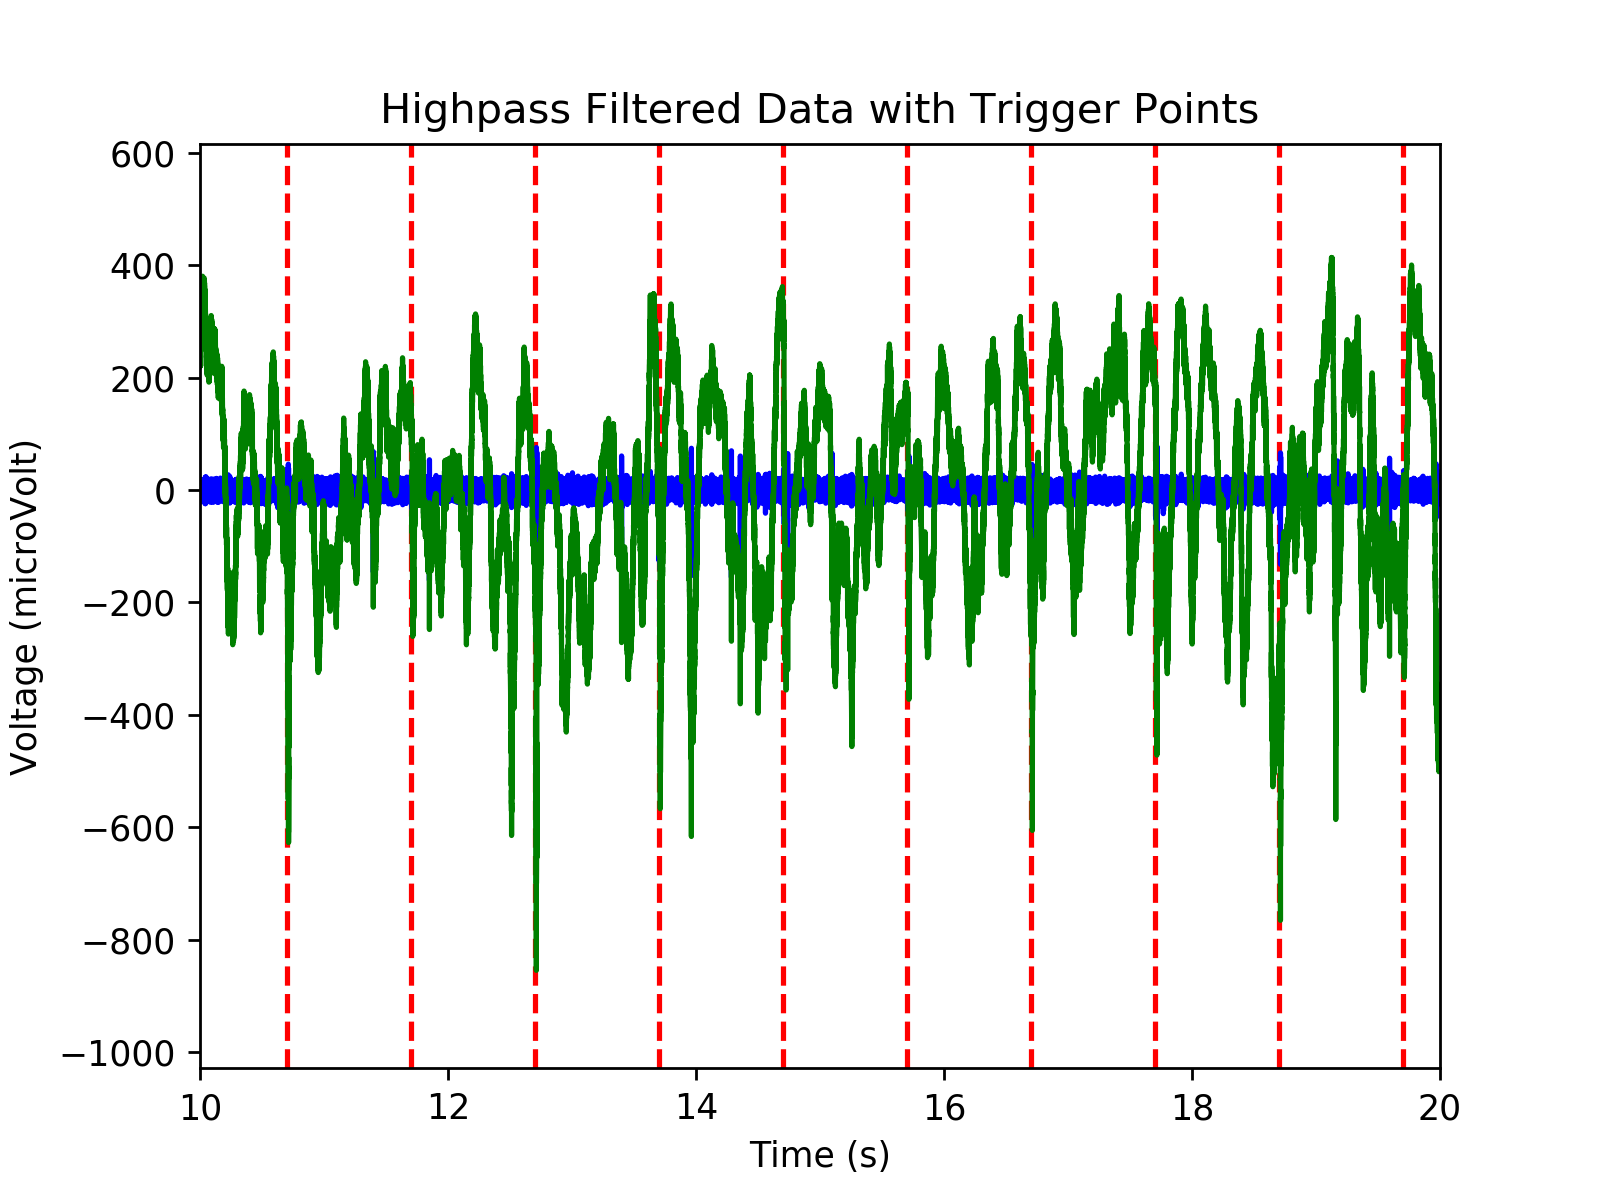

In [5]:
%matplotlib notebook
plt.title("Highpass Filtered Data with Trigger Points")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (microVolt)")
plt.xlim([10, 20])
for i in trig:
    plt.axvline(x = i, linestyle='--', color='r')
plt.plot(x,highpass_signal, color='b')     
plt.plot(x,y, color ='g')
plt.show()

<IPython.core.display.Javascript object>


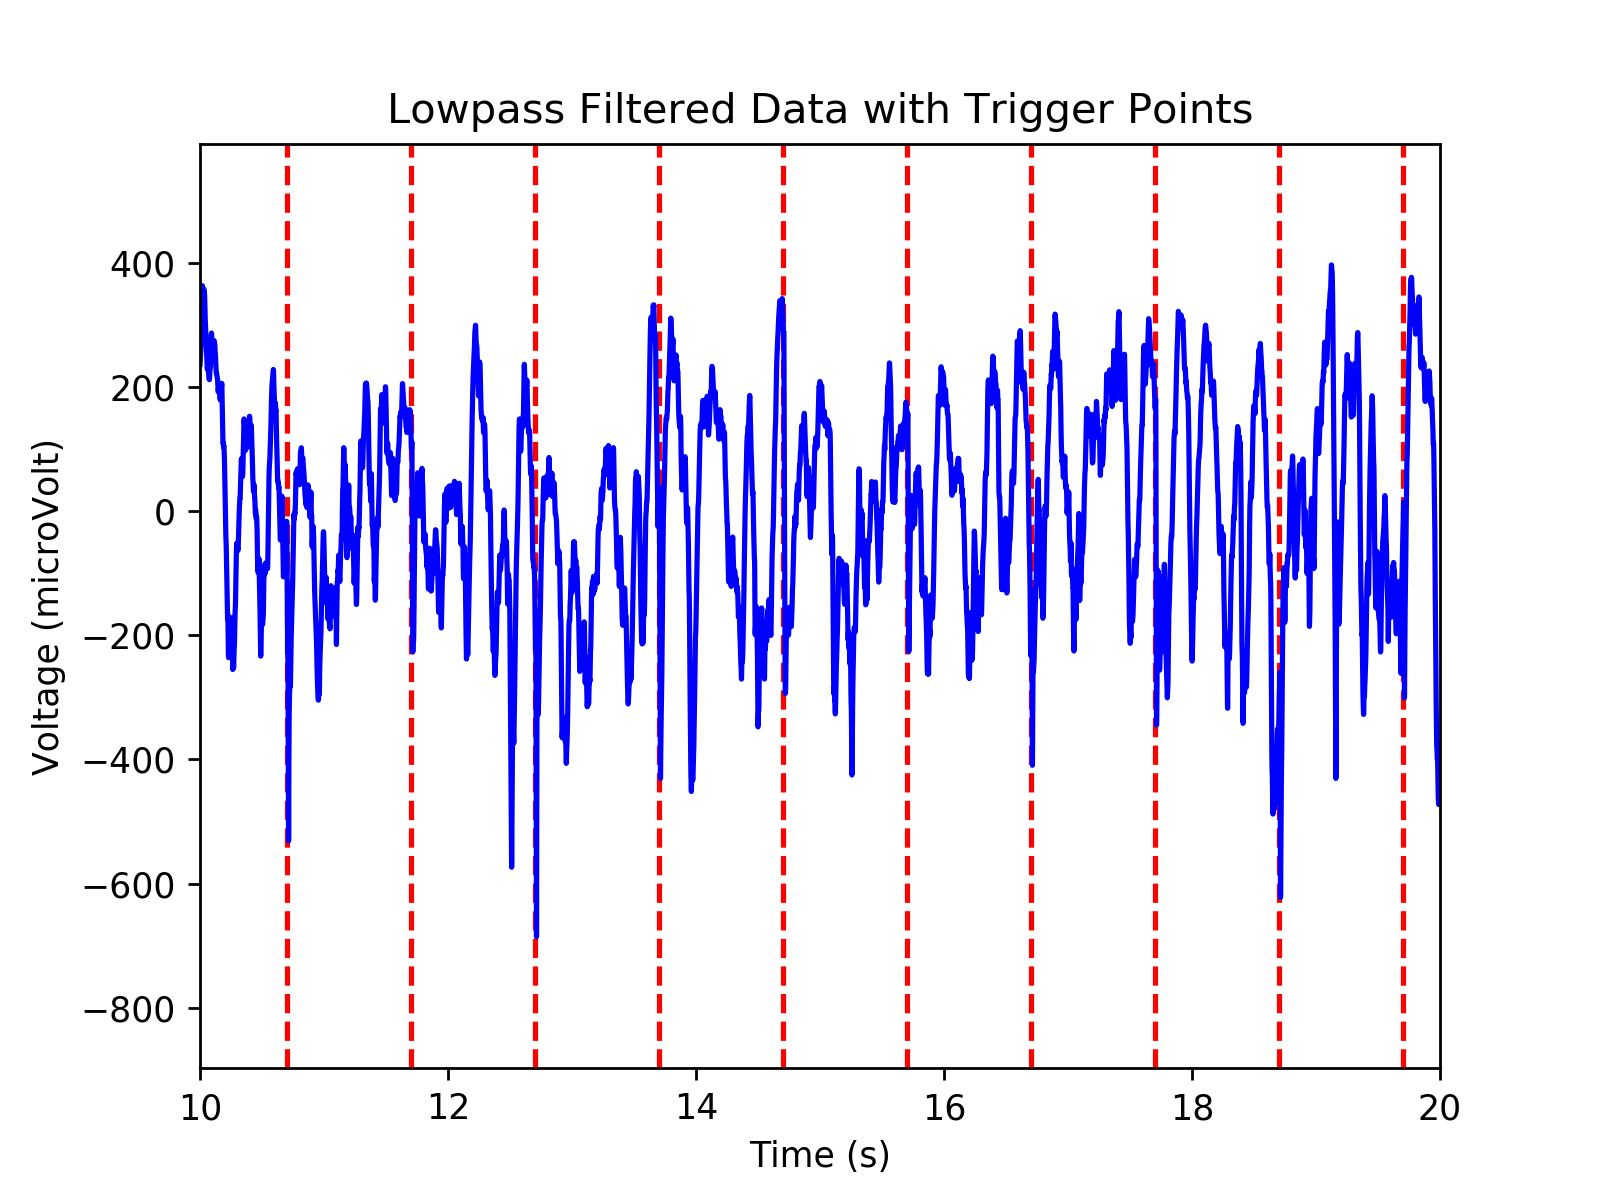

In [6]:
%matplotlib notebook
plt.title("Lowpass Filtered Data with Trigger Points")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (microVolt)")
plt.xlim([10, 20])
for i in trig:
    plt.axvline(x = i, linestyle='--', color='r')
plt.plot(x,lowpass_signal, color='b')
plt.show()

<IPython.core.display.Javascript object>


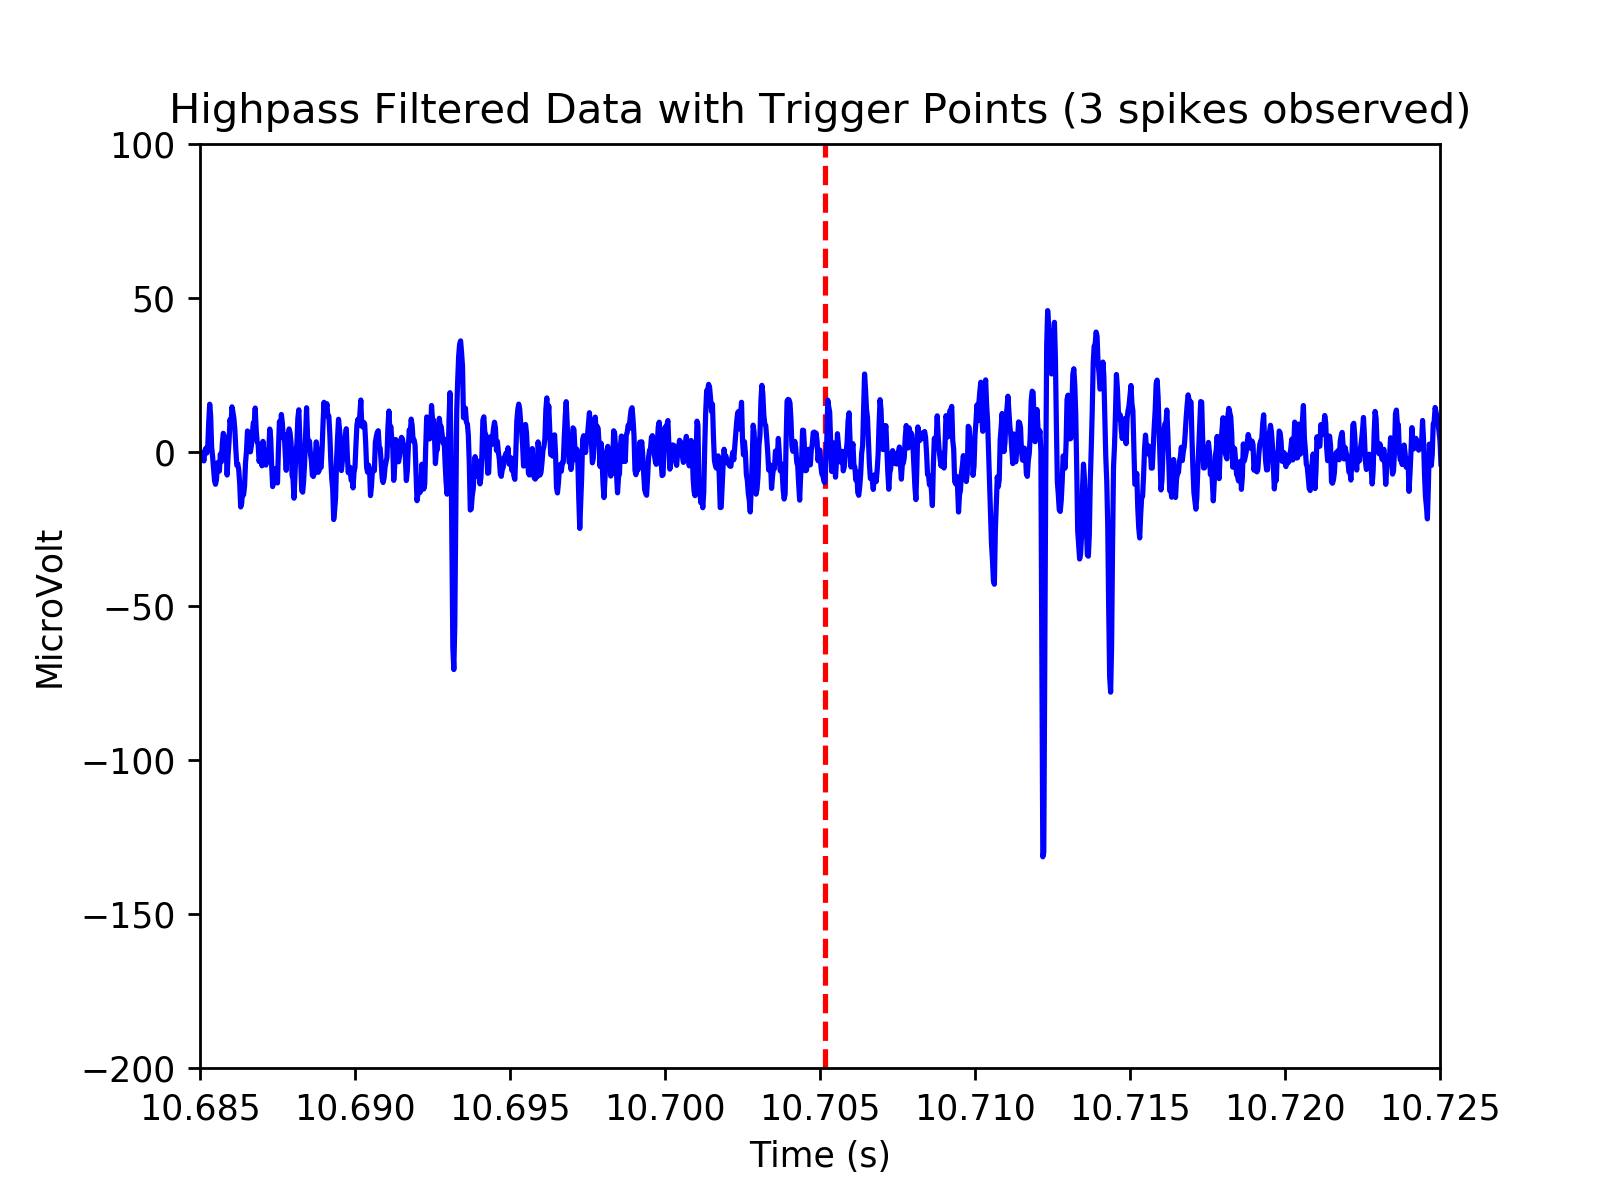

In [7]:
%matplotlib notebook
plt.title("Highpass Filtered Data with Trigger Points (3 spikes observed)")
plt.xlabel("Time (s)")
plt.ylabel("MicroVolt")
plt.xlim([10.685, 10.725])
plt.ylim([-200,100])
for i in trig:
    plt.axvline(x = i, linestyle='--', color='r')
plt.plot(x,highpass_signal, color='b')     
plt.show()

In [8]:
#these 3 lines are for cleaning the memory so that we don't get a memory error later
del trig
del y 
del lowpass_signal

## 4. Functions of Neurotool
In this section all of the functions in analysis_utils.py will be introduced. 

__NOTE: Further details of each function can be found in comment lines of the analysis_utils.py file.__

### 4.1 find_peaks function
This function allows us to find peaks in the highpass filtered signal so that we can detect spikes. This function detect spikes by comparing heights of the points with (coeff * base noise) of the signal in order to determine whether it is a real peak or not. 

In [9]:
# THIS MIGHT TAKE TIME DEPENDING ON YOUR HARDWARE
spikes = find_peaks(highpass_signal, 5)
# peak_heights = spikes[1]['peak_heights'] code also can find peak heights but those can be directly accessed from signal
peak_index = spikes[0]

#this line is for cleaning the memory so that we don't get a memory error later
del spikes

### 4.2 get_spike_train function
This function allows us to derive the spike train from an array of peak indexes and length of the data. 

In [10]:
spike_train = get_spike_train(peak_index, l)

#this line is for cleaning the memory so that we don't get a memory error later
del peak_index

### 4.3 plot_spike_train function
This function allows us to derive the spike train from an array of peak indexes and length of the data. 

<IPython.core.display.Javascript object>


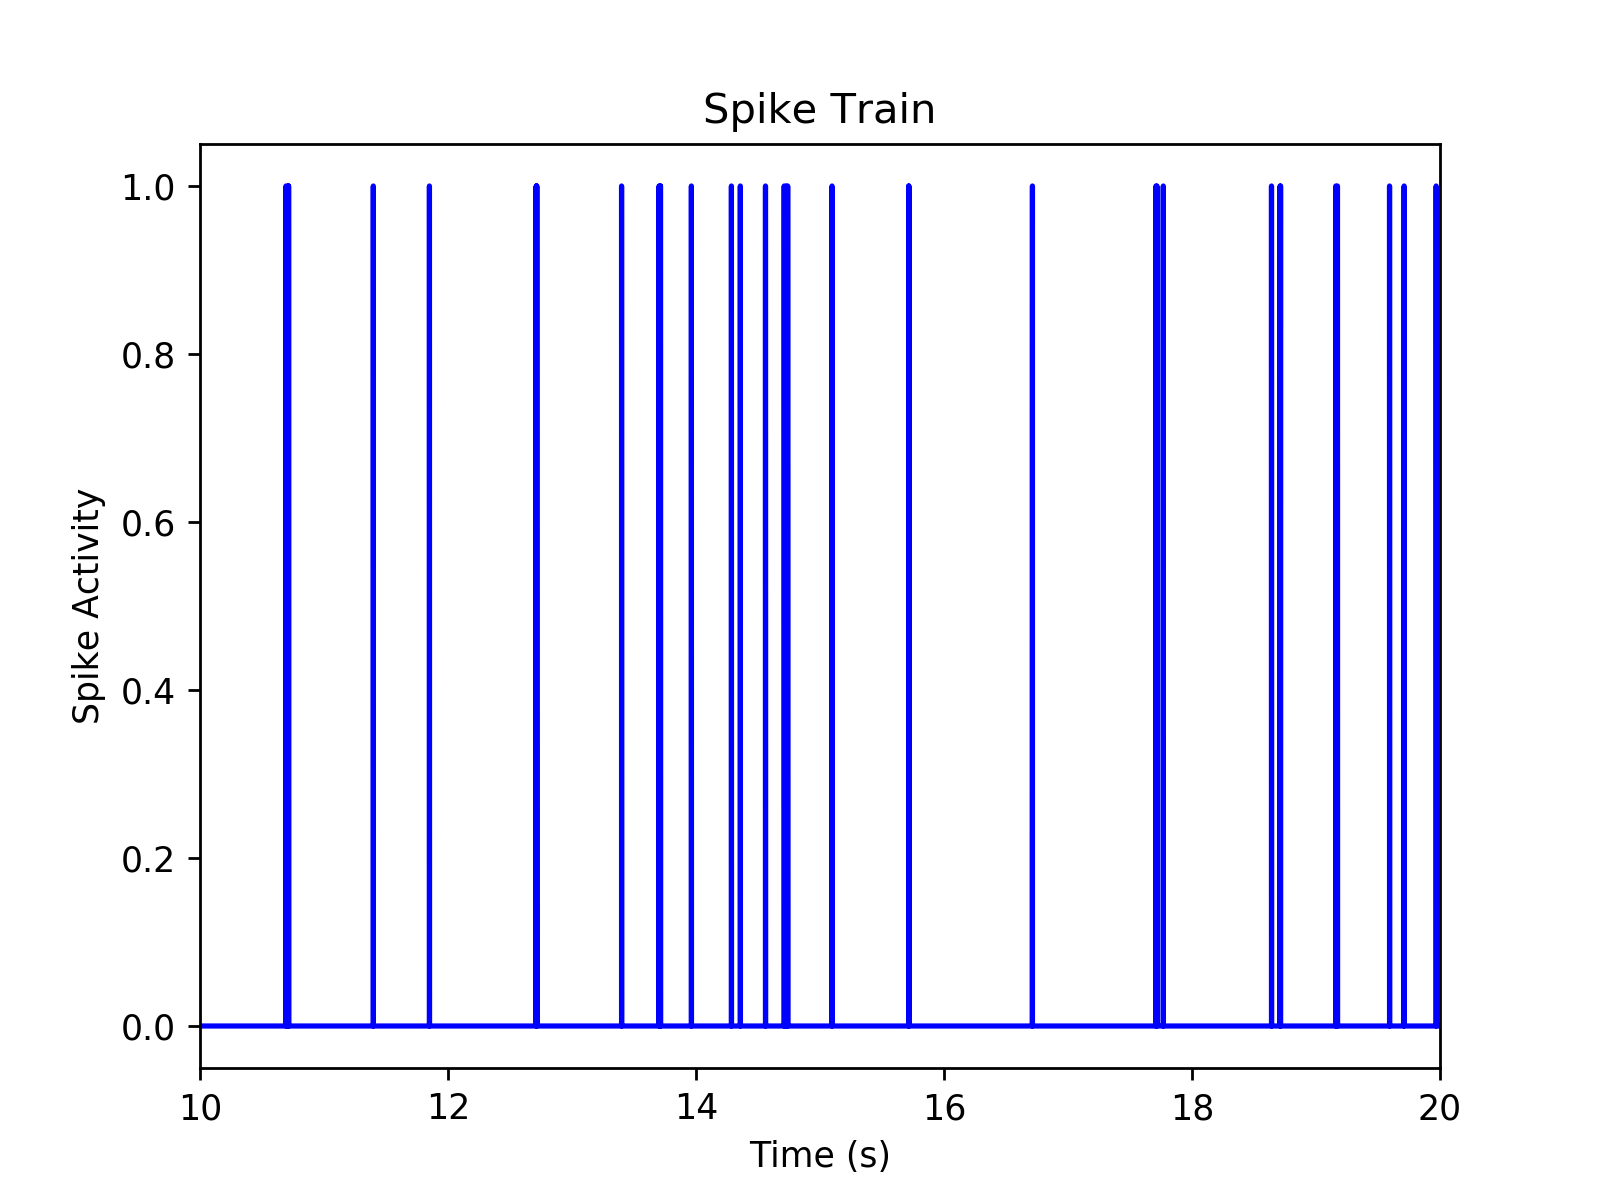

In [11]:
%matplotlib notebook
time_limit = [10,20]
plot_spike_train(spike_train, x, time_limit)

### 4.4 generate_sinwave function
This function helps us generate sin waves of specific length and specific sampling frequency. 

In [12]:
freq_sin = 9
sin_wave = generate_sinwave(freq_sin, l, fs)

#### 4.4.1 Plotting the sin wave
Here we will plot the sin wave in order to see the output of the generate_sinwave function.

<IPython.core.display.Javascript object>


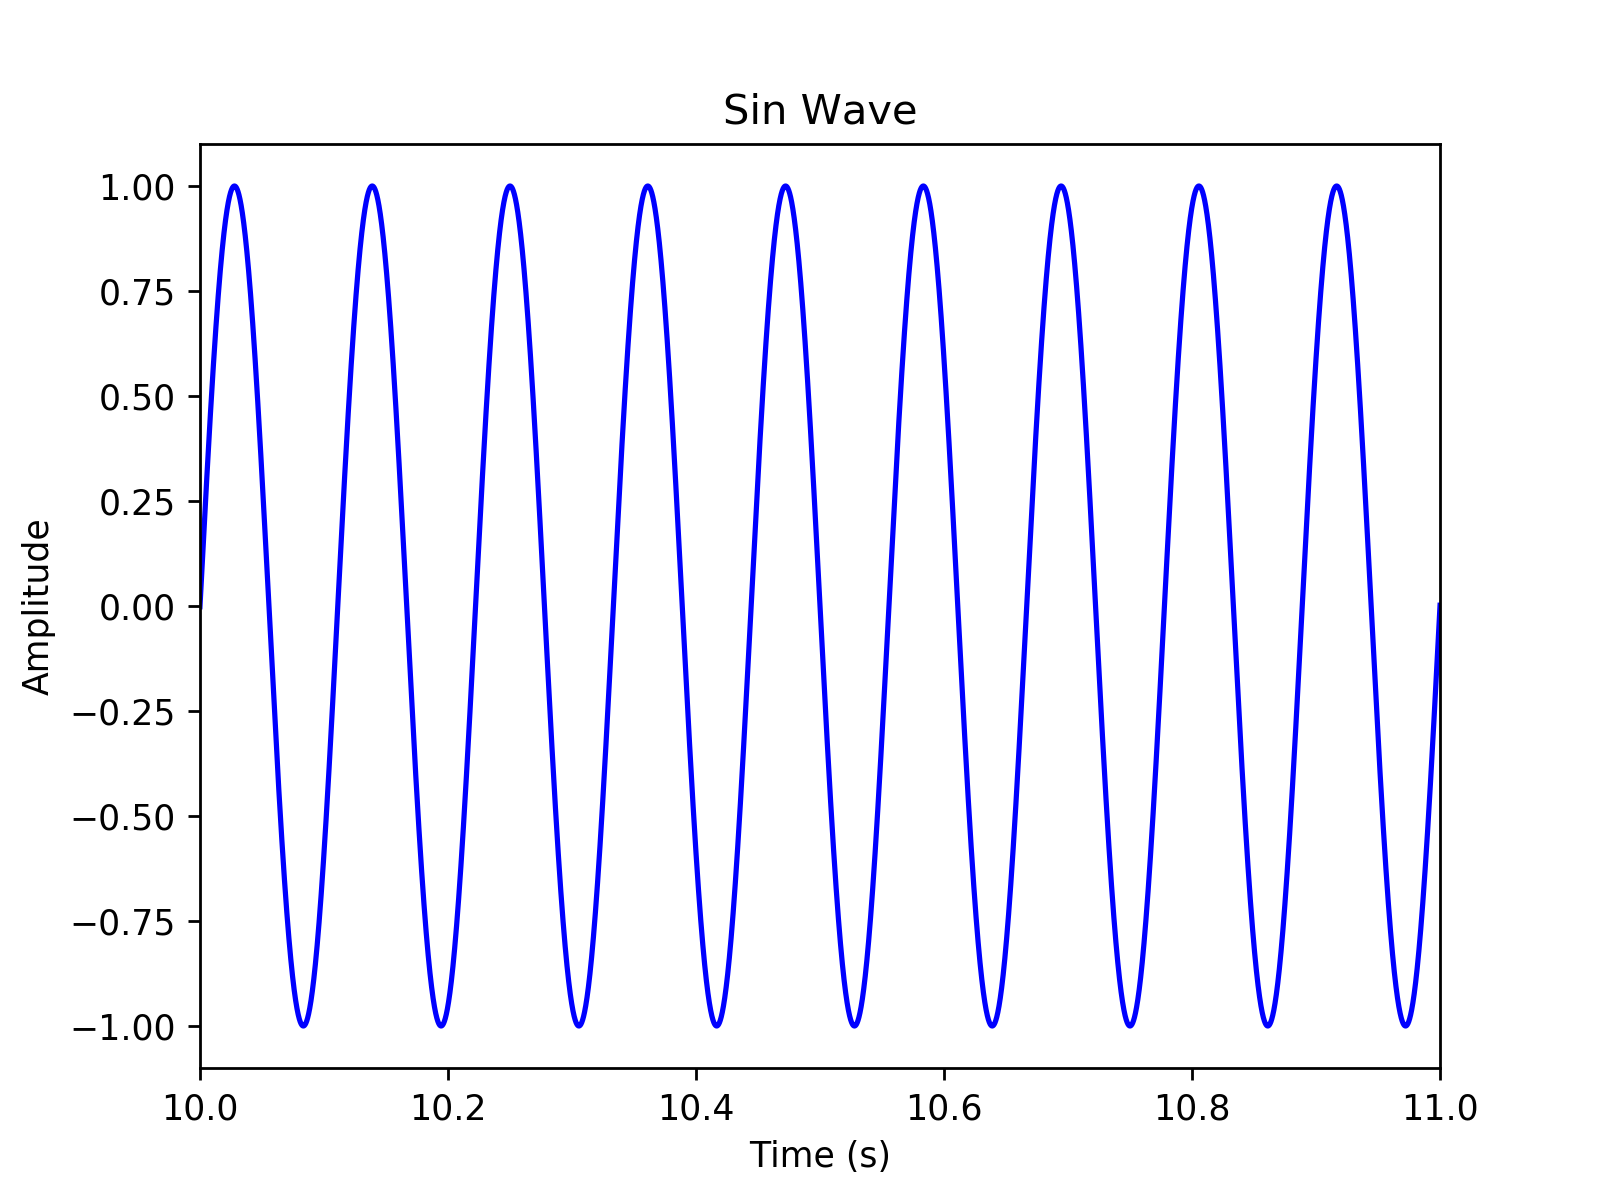

In [13]:
%matplotlib notebook
plt.title("Sin Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim([10, 11])
plt.plot(x,sin_wave, color='b')
plt.show()

### 4.5 phase_hist function
This function helps us generate a phase histogram of a spike train in modulation with a sin wave of specific frequency. Output of this function will be inserted to the functions described below in order to plot normal and polar bar chart of the histogram. This example creates bins of 30 degrees in a sin wave with 9 Hz frequency. 

In [14]:
#THIS MIGHT TAKE TIME DEPENDING ON YOUR HARDWARE
phase = np.pi/6
arr = phase_hist(spike_train, freq_sin, phase, fs)

### 4.6 plot_barchart function
This function utilizes output of the phase_hist function and plots histogram as a bar chart.

<IPython.core.display.Javascript object>


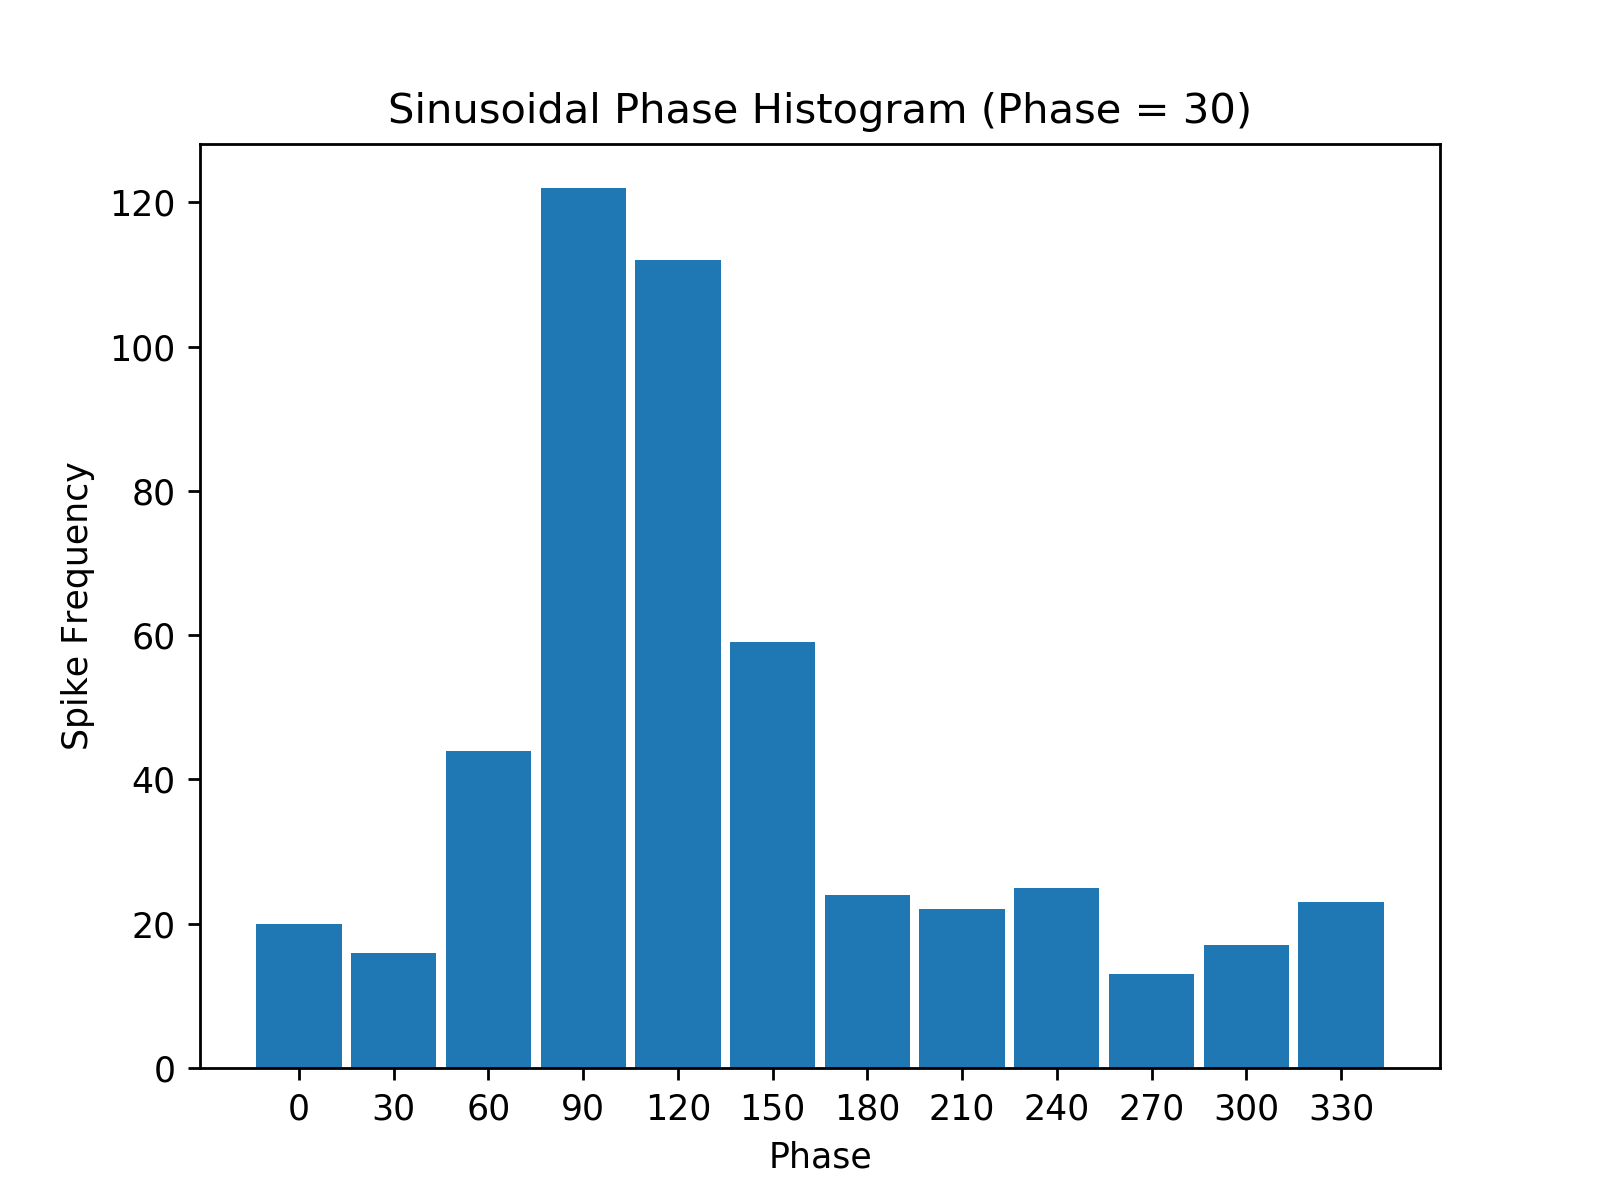

In [15]:
%matplotlib notebook
plot_barchart(arr, phase)

### 4.7 plot_polarbarchart function
This function utilizes output of the phase_hist function and plots histogram as a polar bar chart.

<IPython.core.display.Javascript object>


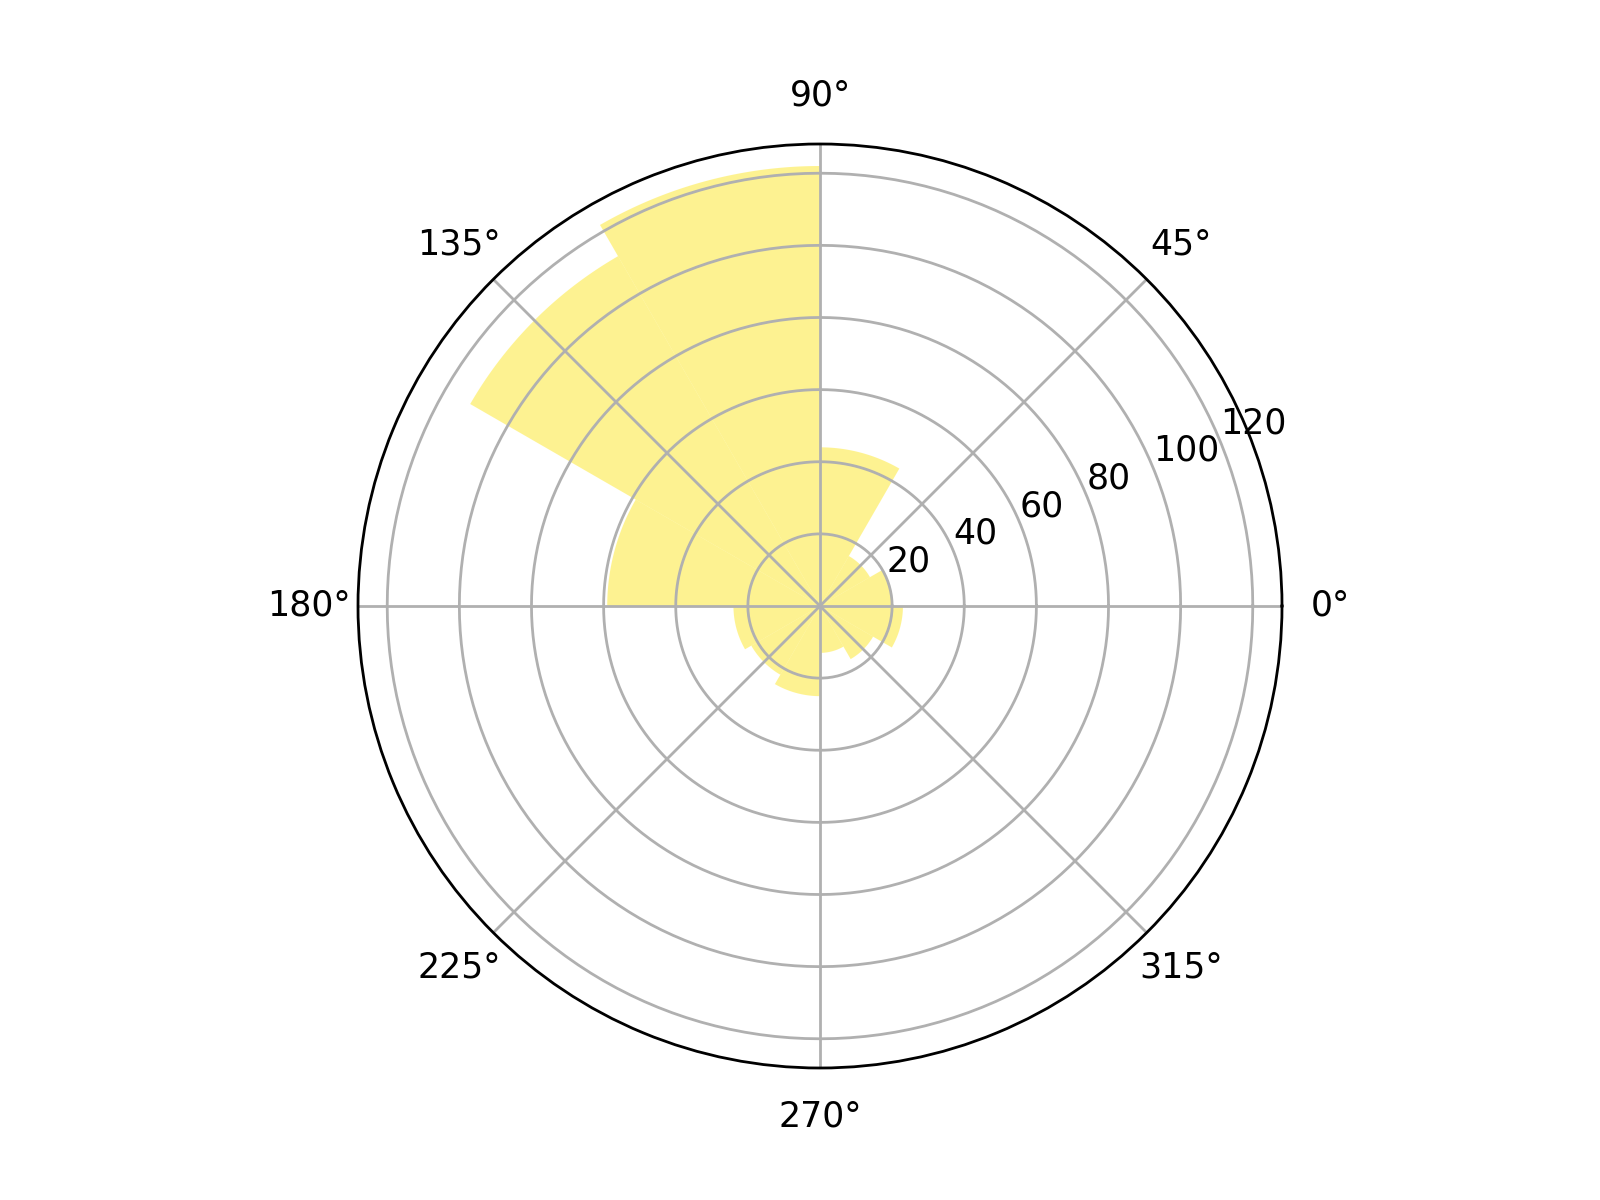

In [16]:
%matplotlib notebook
plot_polarbarchart(arr, phase)

### 4.8 generate_sinsinwave function
This function generates a function in the form signal = A * sin(f_1 t) * sin(f_2 t). Sampling frequency and length of the signal can be specified.  

In [17]:
freq_sin0 = 0.5
freq_sin1 = 15
sinsin_wave = generate_sinsinwave(freq_sin0, freq_sin1, l, fs)

#this line is for cleaning the memory so that we don't get a memory error later
del arr

#### 4.8.1 Plotting the sinsin wave
Here we will plot the sinsin wave in order to see the output of the generate_sinsinwave function.

<IPython.core.display.Javascript object>


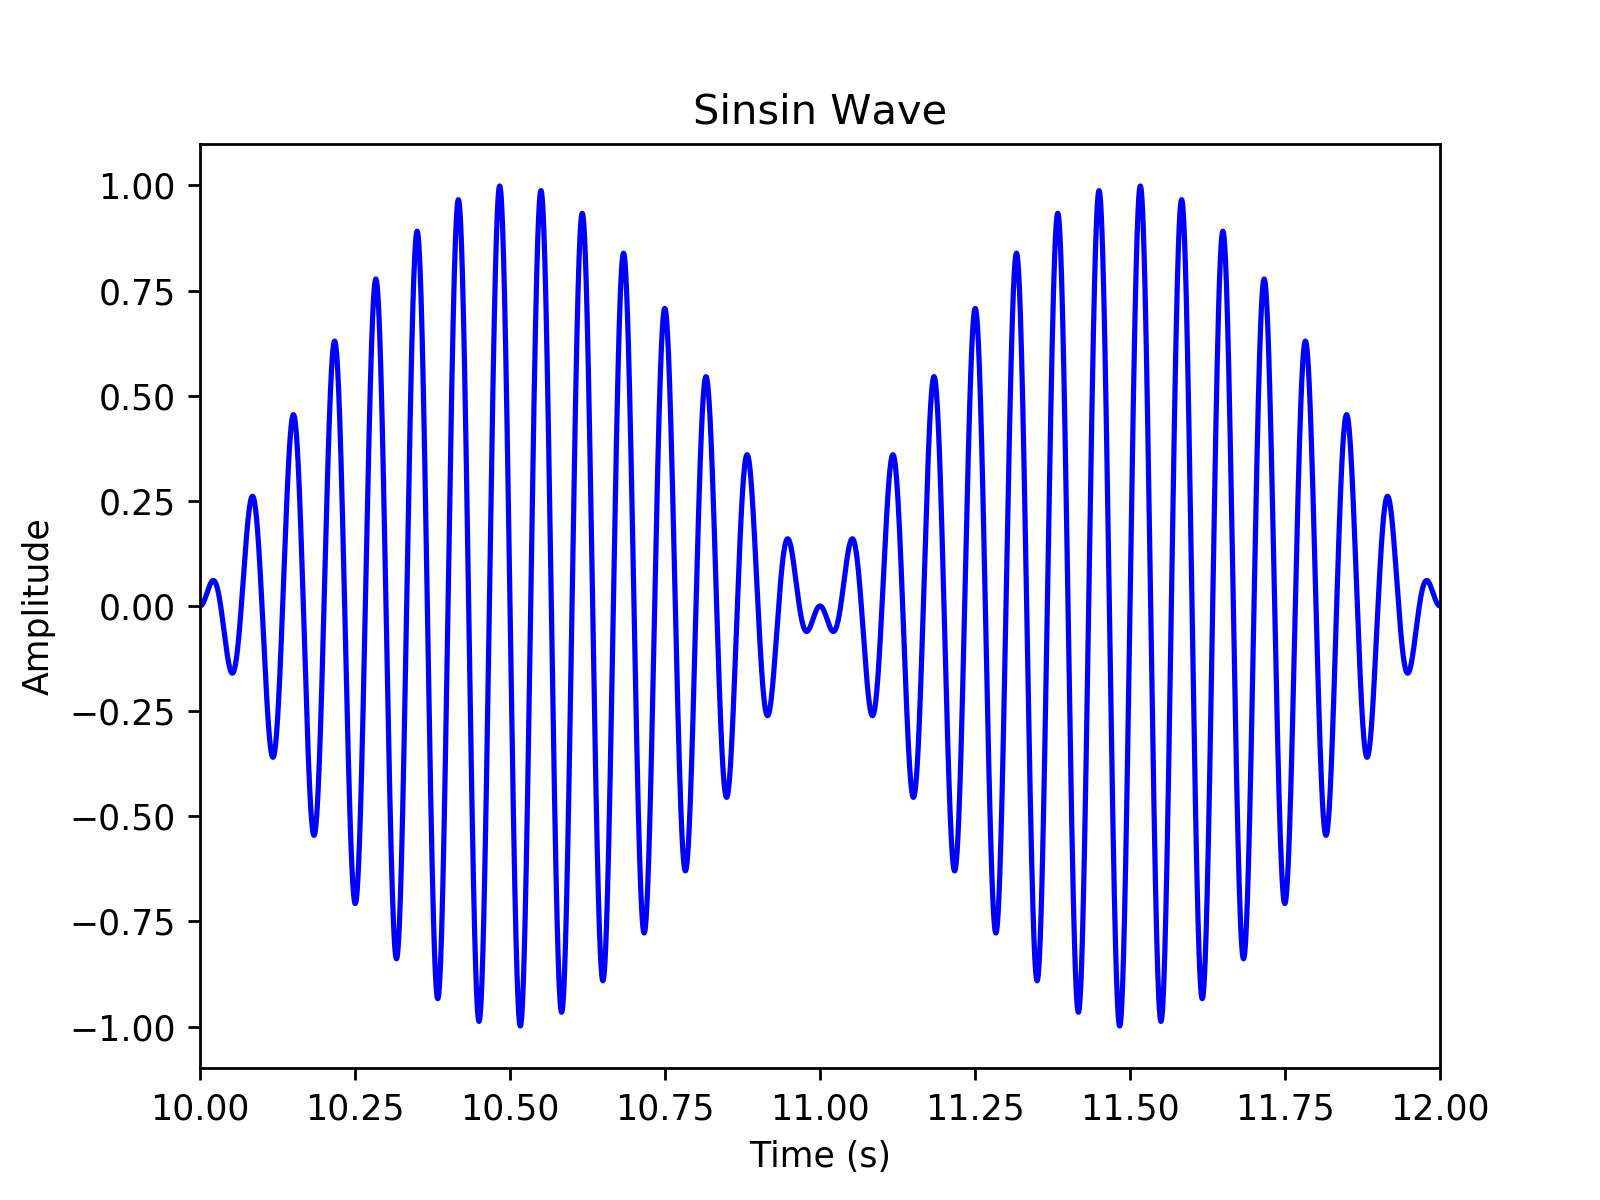

In [18]:
%matplotlib notebook
plt.title("Sinsin Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim([10, 12])
plt.plot(x,sinsin_wave, color='b')
plt.show()

### 4.9 get_spectrum function
This function takes an array and its sampling frequency to generate the frequency domain using Fourier Transform. It is assumed that the the function is periodic.

In [19]:
spectrum = get_spectrum(sinsin_wave, fs)

### 4.10 plot_spectrum function
This function takes the output of find_spectrum function to plot frequency domain using Fourier Transform.

<IPython.core.display.Javascript object>


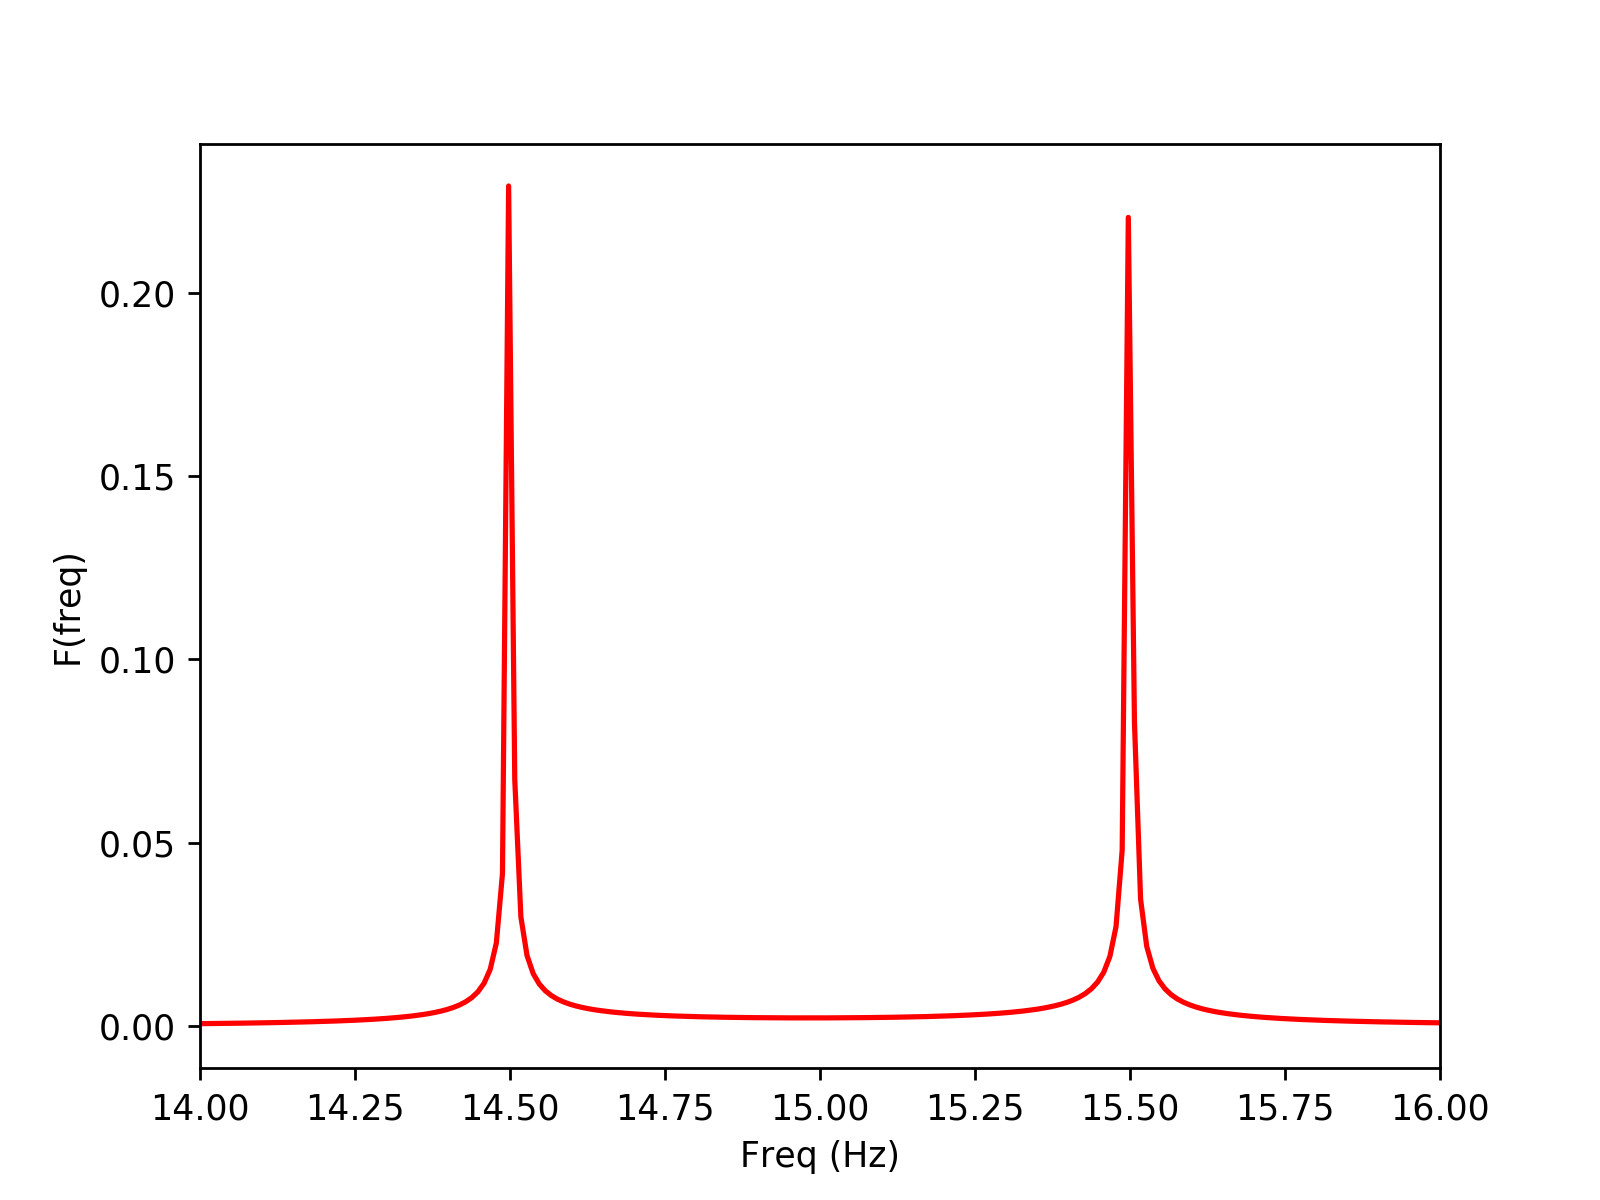

In [20]:
%matplotlib notebook
plot_spectrum(spectrum[0], spectrum[1], [14,16])

### 4.11 get_envelope_wave function
This function takes any function as an input and returns the envelope function

In [21]:
envelope = get_envelope_wave(sinsin_wave)

#this line is for cleaning the memory so that we don't get a memory error later
del spectrum

#### 4.11.1 Finding spectrum of the envelope
We can use the get_spectrum function in order to find spectrum, therefore major frequencies of the envelope function.

In [22]:
envelope_spectrum = get_spectrum(envelope, fs)

#### 4.11.2 Plotting spectrum of the envelope
We can use the get_spectrum function in order to find spectrum, therefore major frequencies of the envelope function.

<IPython.core.display.Javascript object>


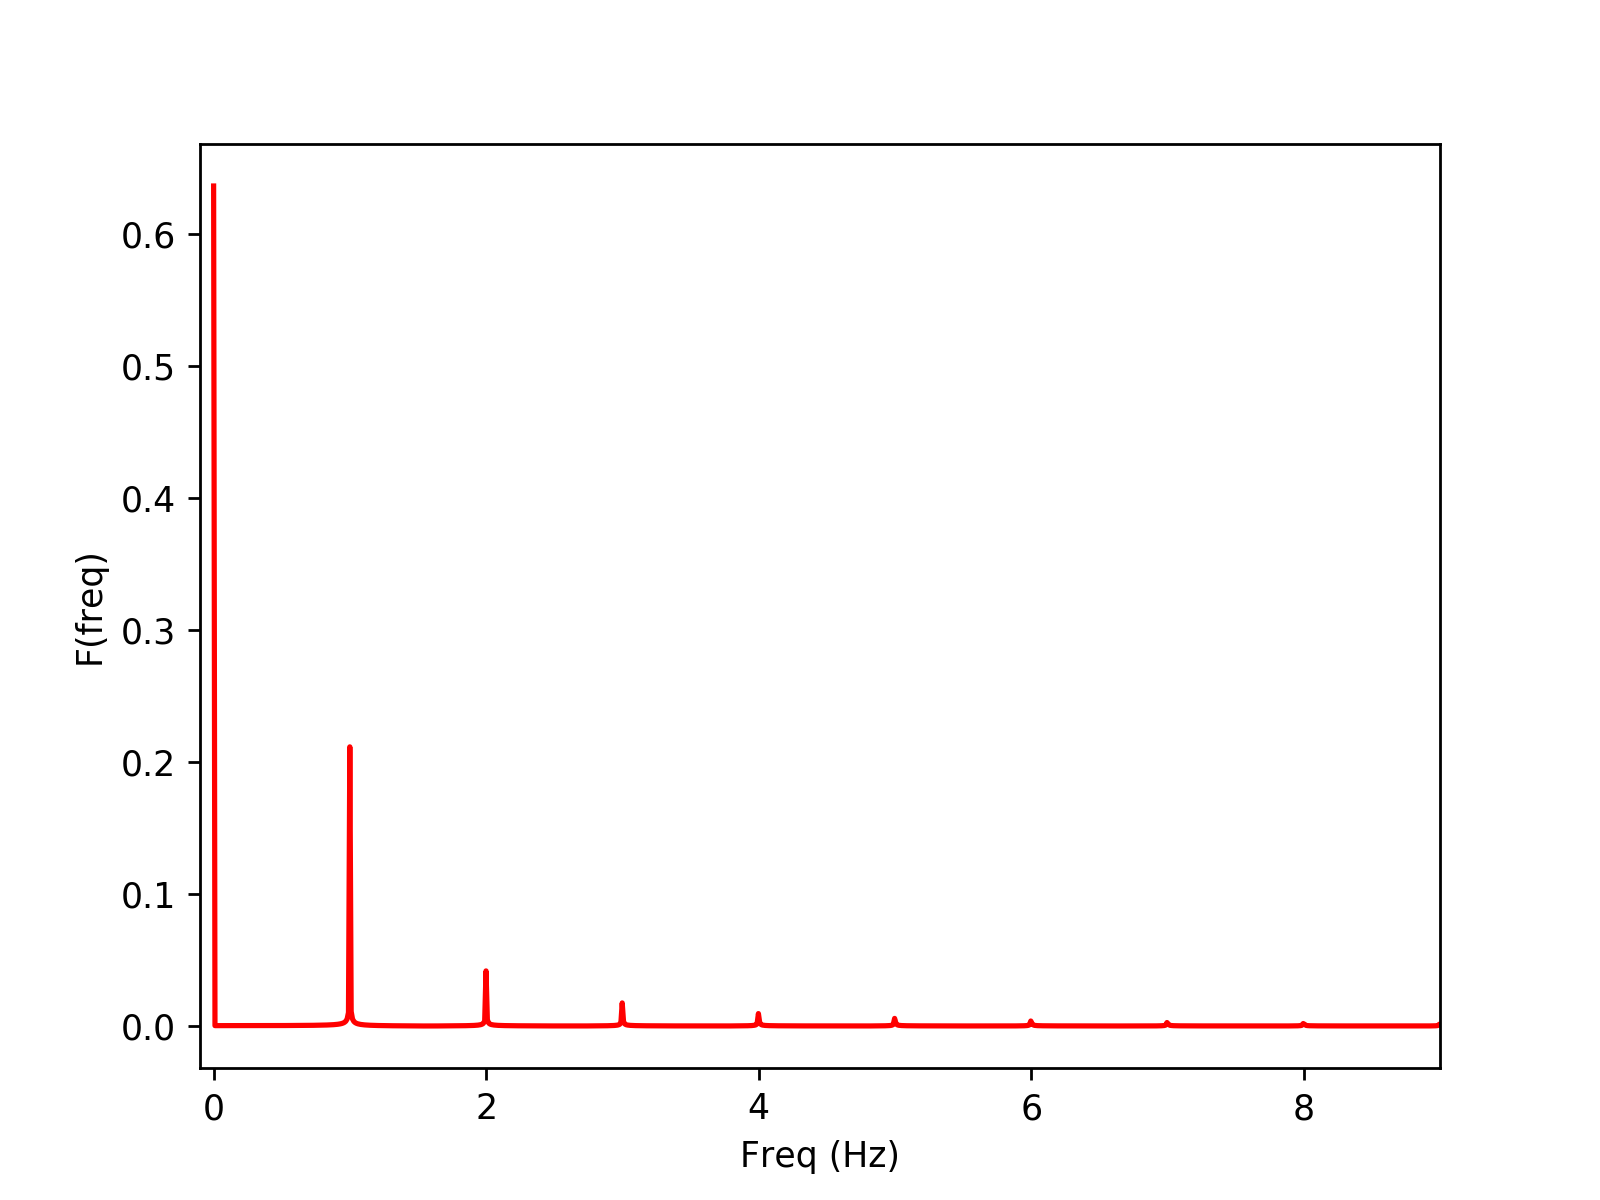

In [23]:
%matplotlib notebook
plot_spectrum(envelope_spectrum[0], envelope_spectrum[1], [-0.1,9])

### 4.12 get_major_freqs function
This function utilizes output of the get_spectrum function in order to find the major frequency components that are above some threshold value.

In [24]:
threshold = 0.1
major_freqs = get_major_freqs(envelope_spectrum[0], envelope_spectrum[1], threshold)
major_freqs

[[0.9995051954477981], [0.21146938064931345]]

### 4.13 get_major_freq function
This function utilizes output of the get_major_freqs function (an array consisting of two arrays with major frequencies and their relative contribution to the spectrum) in order to find the major frequency component. 

__Note: In this case there is only a single frequency that is above the threshold. This function is needed in those cases where there are several major frequencies that are above the manually selected threshold.

In [25]:
major_freq = get_major_freq(major_freqs)
major_freq

0.9995051954477981

## 5. Appendix 1
In this appendix, you can see a plot of a sinsin wave and its envelope, for visualization purposes.

<IPython.core.display.Javascript object>


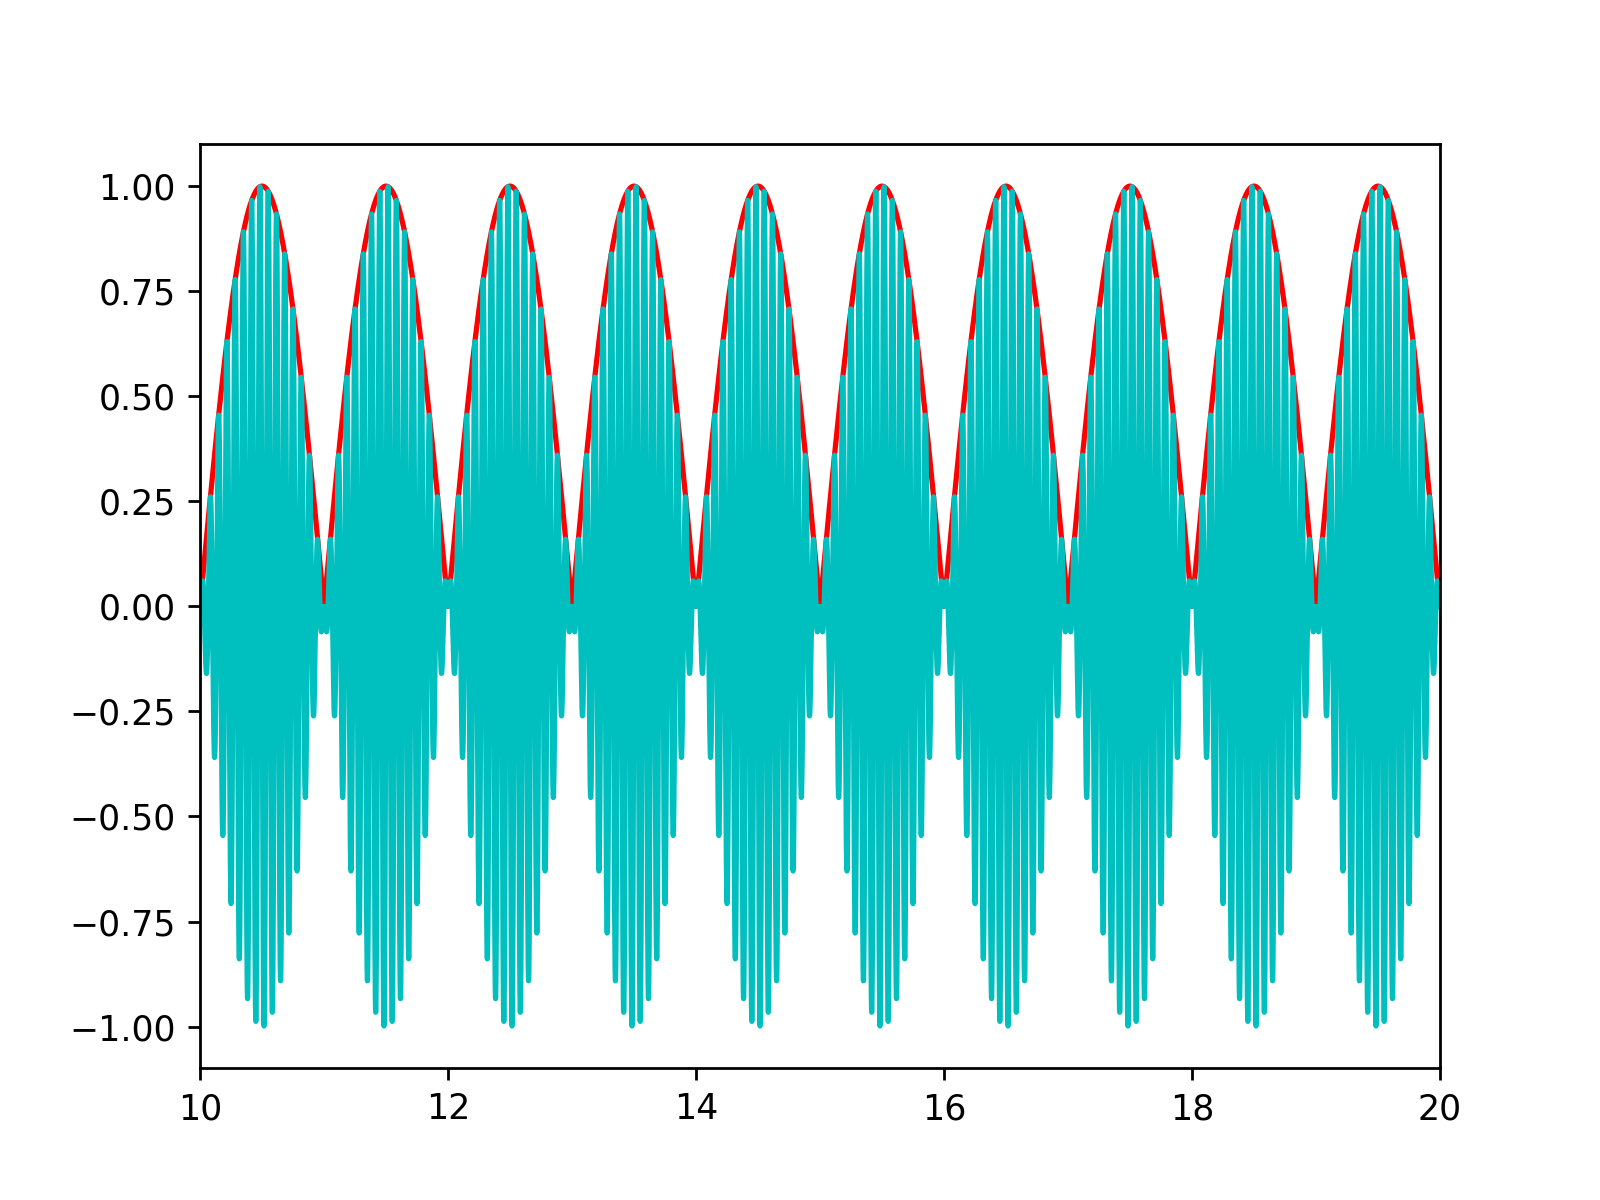

In [26]:
%matplotlib notebook
plt.plot(x, envelope, 'r')
plt.plot(x, sinsin_wave, 'c')
plt.xlim(10,20)
plt.show()

This notebook is created by Mert Unsal in ETH Zurich Neuroinformatics Lab under supervision of PhD. Tansel Baran Yasar. You can reach me out at mailmertunsal@gmail.com for further questions or discussion.